In [88]:
import numpy as np
import os
import matplotlib.pyplot as plt
from imutils import paths

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [15]:
dataset = r'C:\Python38\Projects\Face-Mask-Detector\Dataset'
imagePaths = list(paths.list_images(dataset))

In [16]:
imagePaths

['C:\\Python38\\Projects\\Face-Mask-Detector\\Dataset\\without_mask\\0.jpg',
 'C:\\Python38\\Projects\\Face-Mask-Detector\\Dataset\\without_mask\\0_0_aidai_0014.jpg',
 'C:\\Python38\\Projects\\Face-Mask-Detector\\Dataset\\without_mask\\0_0_aidai_0029.jpg',
 'C:\\Python38\\Projects\\Face-Mask-Detector\\Dataset\\without_mask\\0_0_aidai_0043.jpg',
 'C:\\Python38\\Projects\\Face-Mask-Detector\\Dataset\\without_mask\\0_0_aidai_0074.jpg',
 'C:\\Python38\\Projects\\Face-Mask-Detector\\Dataset\\without_mask\\0_0_aidai_0084.jpg',
 'C:\\Python38\\Projects\\Face-Mask-Detector\\Dataset\\without_mask\\0_0_aidai_0136.jpg',
 'C:\\Python38\\Projects\\Face-Mask-Detector\\Dataset\\without_mask\\0_0_anhu_0004.jpg',
 'C:\\Python38\\Projects\\Face-Mask-Detector\\Dataset\\without_mask\\0_0_anhu_0020.jpg',
 'C:\\Python38\\Projects\\Face-Mask-Detector\\Dataset\\without_mask\\0_0_anhu_0025.jpg',
 'C:\\Python38\\Projects\\Face-Mask-Detector\\Dataset\\without_mask\\0_0_anhu_0027.jpg',
 'C:\\Python38\\Projects\\F

In [90]:
data=[]
labels=[]

for i in imagePaths:
    label=i.split(os.path.sep)[-2]
    labels.append(label)
    image=load_img(i,target_size=(224,224))
    image=img_to_array(image)
    image=preprocess_input(image)
    data.append(image)

In [91]:
data

[array([[[-0.94509804, -0.9764706 , -0.85882354],
         [-0.94509804, -0.9764706 , -0.85882354],
         [-0.94509804, -0.9764706 , -0.85882354],
         ...,
         [-0.8509804 , -0.90588236, -0.78039217],
         [-0.8509804 , -0.90588236, -0.78039217],
         [-0.84313726, -0.8980392 , -0.77254903]],
 
        [[-0.9137255 , -0.94509804, -0.827451  ],
         [-0.9137255 , -0.94509804, -0.827451  ],
         [-0.9137255 , -0.94509804, -0.827451  ],
         ...,
         [-0.7647059 , -0.79607844, -0.6784314 ],
         [-0.7647059 , -0.79607844, -0.6784314 ],
         [-0.75686276, -0.7882353 , -0.67058825]],
 
        [[-0.92156863, -0.9607843 , -0.8039216 ],
         [-0.92156863, -0.9607843 , -0.8039216 ],
         [-0.92156863, -0.9607843 , -0.8039216 ],
         ...,
         [-0.88235295, -0.8980392 , -0.7882353 ],
         [-0.8666667 , -0.88235295, -0.77254903],
         [-0.85882354, -0.8745098 , -0.7647059 ]],
 
        ...,
 
        [[ 0.3803922 , -0.9607843 

In [60]:
labels

['without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask

In [92]:
data=np.array(data,dtype='float32')
labels=np.array(labels)

In [95]:
data.shape

(3833, 224, 224, 3)

In [96]:
labels

array(['without_mask', 'without_mask', 'without_mask', ..., 'with_mask',
       'with_mask', 'with_mask'], dtype='<U12')

In [97]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [98]:
labels

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [99]:
train_X,test_X,train_Y,test_Y=train_test_split(data,labels,test_size=0.20,stratify=labels,random_state=10)

In [100]:
train_X.shape

(3066, 224, 224, 3)

In [101]:
train_Y.shape

(3066, 2)

In [102]:
test_X.shape

(767, 224, 224, 3)

In [103]:
test_Y.shape

(767, 2)

In [104]:
aug=ImageDataGenerator(rotation_range=20,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,horizontal_flip=True,vertical_flip=True,fill_mode='nearest')

In [106]:
aug

In [108]:
baseModel=MobileNetV2(weights='imagenet',include_top=False,input_tensor=Input(shape=(224,224,3)))

In [109]:
baseModel.summary() 

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [114]:
headModel=baseModel.output
headModel=AveragePooling2D(pool_size=(7,7))(headModel)
headModel=Flatten(name='Flatten')(headModel)
headModel=Dense(128,activation='relu')(headModel)
headModel=Dropout(0.5)(headModel)
headModel=Dense(2,activation='softmax')(headModel)

model=Model(inputs=baseModel.input,outputs=headModel)

In [116]:
for layer in baseModel.layers:
    layer.trainable = False

In [117]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________________

In [119]:
learning_rate = 0.0001
Epochs = 20
BS = 12

opt = Adam(lr = learning_rate, decay = learning_rate/Epochs)
model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])

H = model.fit(
    aug.flow(train_X,train_Y, batch_size = BS),
    steps_per_epoch = len(train_X)//BS,
    validation_data = (test_X, test_Y),
    validation_steps = len(test_X)//BS,
    epochs = Epochs
)

model.save(r'C:\Python38\Projects\Face-Mask-Detector\mobilenet_v2.model')

Epoch 1/20
255/255 [==============================] - 67s 264ms/step - loss: 0.0935 - accuracy: 0.9689
Epoch 2/20
255/255 [==============================] - 60s 234ms/step - loss: 0.0810 - accuracy: 0.9712
Epoch 3/20
255/255 [==============================] - 63s 247ms/step - loss: 0.0731 - accuracy: 0.9748
Epoch 4/20
255/255 [==============================] - 69s 270ms/step - loss: 0.0609 - accuracy: 0.9800
Epoch 5/20
255/255 [==============================] - 65s 255ms/step - loss: 0.0569 - accuracy: 0.9774
Epoch 6/20
255/255 [==============================] - 68s 268ms/step - loss: 0.0557 - accuracy: 0.9826
Epoch 7/20
255/255 [==============================] - 61s 241ms/step - loss: 0.0533 - accuracy: 0.9787
Epoch 8/20
255/255 [==============================] - 61s 240ms/step - loss: 0.0494 - accuracy: 0.9826
Epoch 9/20
255/255 [==============================] - 64s 250ms/step - loss: 0.0471 - accuracy: 0.9846
Epoch 10/20
255/255 [==============================] - 61s 239ms/step - l

FailedPreconditionError: C:\Python38\Projects\Face-Mask-Detector\mobilenet_v2.model is not a directory

In [121]:
predict = model.predict(test_X, batch_size = BS)
predict = np.argmax(predict, axis = 1)
print(classification_report(test_Y.argmax(axis = 1), predict, target_names = lb.classes_))

              precision    recall  f1-score   support

   with_mask       0.99      0.99      0.99       383
without_mask       0.99      0.99      0.99       384

    accuracy                           0.99       767
   macro avg       0.99      0.99      0.99       767
weighted avg       0.99      0.99      0.99       767



KeyError: 'acc'

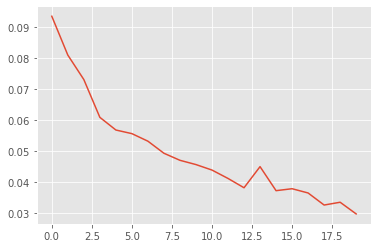

In [124]:
N = Epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig(r'C:\Python37\Projects\face-mask-detector\plot_v2.png') 